In [16]:
import numpy as np
import matplotlib.pyplot as plt

# FFT for option pricing

talk in the motivation that it is interesting to use this method because computationally is very good, complexity is N log N instead of N2

We would like to dive deeper in the study of option price of assets under the Heston model. Since we can find analytically the characteristic function of the risk-neutral density of such assets, we can use the proposed FFT method for option pricing. Here we will study the pricing of an European call of maturity $T$, hence with payoff:

$$
\text{Payoff} = (S_{T} - K)^{+}
$$

Where $S_{T}$ is the price at maturity of the given asset. In the following we will keep the same notation as in the paper. 

Let us look at the risk-neutral density of the log price $s_{T} = \log(S_{T})$ of density $q_{T}$. The characteristic function of the log price is therefore:

$$
\phi_{T}(u) = \int_{-\infty}^{\infty} e^{ius}q_{T}(s)ds
$$

Under the risk-neutral assumption, we have that the price $C_{T}(k)$ of an European call with strike log-strike $k$ ($k = \log(K)$) and maturity $T$:

$$
C_{T}(k) = \int_{k}^{+\infty} e^{-rT} (e^{s} - e^{k}) q_{T}(s)ds
$$

Since when $k\rightarrow - \infty$ we have that $C_{T}(k)\rightarrow S_{0}$, the price of the call is not square-integrable, and thus we perform the following adaptation:

$$
c_{T}(k) := e^{\alpha k} C_{T}(k)
$$

Which, for a certain range of values of $\alpha$ that will be determined later, makes $c_{T}(k)$ a square integrable function in $k$. Now let us perform the Fourier transform of $c_{T}(k)$:

$$
\Psi(v) = \int_{-\infty}^{+\infty} e^{ivk}c_{T}(k)dk
$$

Using the inverse Fourier transform, we can retrieve the call price:

$$
C_{T}(k) = \frac{e^{- \alpha k}}{2\pi}\int_{-\infty}^{\infty}e^{-ivk}\Psi_{T}(v)dv
$$

Since $C_{T}(k)$ is real:

$$
C_{T}(k) = \frac{e^{- \alpha k}}{\pi}\int_{0}^{\infty}e^{-ivk}\Psi_{T}(v)dv
$$

Now if we look back at the forward Fourier transform, may compute it explicitely:

$$
\Psi_{T}(v) = \int_{-\infty}^{\infty} e^{ivk} \int_{k}^{+\infty}e^{\alpha k} e^{-rT}(e^{s} - e^{k})q_{T}(s) dsdk
$$

Inversing the integrals:

$$
\Psi_{T}(v) = \int_{-\infty}^{\infty} e^{-rT} q_{T}(s)\int_{-\infty}^{s}(e^{s+\alpha k} - e^{1+\alpha}k)e^{ivk}dkds
$$

$$
\Psi_{T}(v) = \int_{-\infty}^{\infty} e^{-rT} q_{T}(s) \left(\frac{e^{(\alpha + 1 + iv)s}}{\alpha + iv} - \frac{e^{(\alpha + 1 + iv)s}}{\alpha + 1 + iv}\right) ds
$$

$$
\Psi_{T}(v) = \frac{e^{-rT}}{\alpha^{2} + \alpha - v^{2} + i(2\alpha + 1)v}   \int_{-\infty}^{\infty} e^{i(v -(\alpha + 1)i)s} q_{T}(s) ds
$$

Which is exactly, by using the characteristic function of the log-price:

$$
\Psi_{T}(v) = \frac{e^{-rT} \phi_{T}(v - (\alpha + 1)i)}{\alpha^{2} + \alpha - v^{2} + i(2\alpha + 1)v} 
$$

Hence, we could replace that on our equation for $C_{T}(k)$:

$$
C_{T}(k) = \frac{e^{- \alpha k}}{\pi}\int_{0}^{\infty}e^{-ivk}\Psi_{T}(v)dv
$$

To obtain the price of our call. We remark that this is simply a direct Fourier transform. As indicated in the paper, we remark that the denominator vanishes when both $\alpha = 0$ and $v = 0$, inducing a singularity, which reinforces the choice of adding $\alpha$ for integrability purposes.

## Adressing the choice of $\alpha$

## Option pricing using FFT

Now we move to the numerical part of the problem. Here we attempt to rewrite the integration of the previous section as a summation that allows direct application of the FFT.

Set $v_{j} = \eta(j-1)$. Using the trapezoid rule on the integral:

$$
C_{T}(k) \approx \frac{e^{-\alpha k}}{\pi} \sum_{j=1}^{N} e^{-iv_{j}k}\Psi_{T}(v_{j})\eta
$$

Which we do by setting the upper limit of our integral at $a = N\eta$

In other words, we simply fixed $a$ to be the limit of our integral and created a grid of with $N$ steps in our summation.

Since we are interest in at-the-money call values we are looking at values of $k$ that are near 0.

The FFT shall return $N$ values of $k$ to which we employ a regular spacing of size $\lambda$, hence, our values of $k$ are:

$$
k_{u} = -b + \lambda (u-1), \quad u\in \{1,\dots, N\}
$$

We now replace substitute these values on our summation:

$$
C_{T}(k_{u}) \approx \frac{e^{-\alpha k_{u}}}{\pi} \sum_{j=1}^{N} e^{-iv_{j}k_{u}}\Psi_{T}(v_{j})\eta
$$

$$
C_{T}(k_{u}) \approx \frac{e^{-\alpha k_{u}}}{\pi} \sum_{j=1}^{N} e^{-iv_{j}[-b+\lambda (u-1)]}\Psi_{T}(v_{j})\eta
$$

$$
C_{T}(k_{u}) \approx \frac{e^{-\alpha k_{u}}}{\pi} \sum_{j=1}^{N} e^{-iv_{j}\lambda (u-1)}e^{ibv_{j}}\Psi_{T}(v_{j})\eta
$$

We can also replace $v_{j}$:

$$
C_{T}(k_{u}) \approx \frac{e^{-\alpha k_{u}}}{\pi} \sum_{j=1}^{N} e^{-i\eta\lambda(j-1)(u-1)}e^{ibv_{j}}\Psi_{T}(v_{j})\eta
$$

To apply the fast Fourier transform we must guarantee therefore:

$$
\lambda \eta = \frac{2\pi}{N}
$$

Hence there is a clear trade off between having a fine grid with $\eta$ small, and having a small space between the values of $k_{u}$ that we are able to compute.

To be able to maintain accurate enough integration with larger values of $\eta$ we can incorporate Simpson's rule (composite Simpson's 1/3 rule), rewriting our summation as:

$$
C_{T}(k_{u}) \approx \frac{e^{-\alpha k_{u}}}{\pi} \sum_{j=1}^{N} e^{-i\frac{2\pi}{N}(j-1)(u-1)}e^{ibv_{j}}\Psi_{T}(v_{j})\frac{\eta}{3}[3+(-1)^{j} - \delta_{j-1}]
$$

It is our task to therefore choose appropriately $\lambda$ and $\alpha$

## Computing the Heston characteristic function $\phi$

The heston stochastic model is given by the system of SDE :

$$dS_t = \mu S_t dt + \sqrt{V_t} S_t dW_S(t)$$
$$dV_t = \kappa (\theta - V_t) dt + \omega \sqrt{V_t} d W_V(t)$$

with correlated Brownian motions $dW_S(t)dW_V(t) =  \rho dt$, and two initial state $S_0$ and $V_0$.

We recall the characteristic function of $S_t$ : $$\phi(u) = \mathbb{E}[S_t^{iu}] = \mathbb{E}[e^{iu \ln(S_T)}] $$

You can find the computation of the characteristic function in the original paper of Heston, and it's defined as follow :

$$\phi(u) = e^{C(u) + D(u)V_0 + iu \ln F} $$

Where

$$F =S_0 e^{\mu T}$$

$$C(u) = \frac{\kappa \theta}{\omega^2} \left( (\kappa - \rho \omega u i + d(u))T - 2 \ln \left(\frac{c(u)e^{d(u)T} - 1}{c(u) - 1} \right) \right)$$

$$D(u) = \frac{\kappa - \rho \omega u i + d(u)}{\omega^2} \cdot \frac{e^{d(u)T} - 1}{c(u)e^{d(u)T} - 1}$$


with 

$$ c(u) = \frac{\kappa - \rho \omega u i + d(u)}{\kappa - \rho \omega u i - d(u)}, \ \  \ \  \ \   d(u)  = \sqrt{(\rho \omega u i - \kappa)^2 + iu\omega^2 + \omega^2 u^2}$$ 

One can notice that these equations make use of the logarithm of complex numbers, which is a function that is could have multiplied definition, and not continuous.

for example, if $z = x + iy =  r_z e^{i t_z} $ where $ t_z \in ]-\pi, \pi] $, the logarithm of $z$ in python liberaries is : 

$$log(z) = log(r_z) + i t_z$$

Called the principal branche.


- We studied the paper of C.Kahl, P.Jackel ["Not-so-complex logarithms in the Heston model"], where the authors pointed out the errors of option pricing involving Heston stochastics model due to the evaluation of complex argument.
- The paper proposes an alternative to solve this issue, and that garanties the continuity of the $\phi(u)$

First of all, we write in another way the characteristic function :

$$\phi(u) = G(u)^{-2\gamma} e^{R(u) + D(u)V_0 + iu \ln F} $$

where $$G(u) = \frac{c(u)e^{d(u)T} - 1}{c(u)-1}, \ \   R(u) = \gamma (\kappa - \rho \omega u i + d(u))T,  \ \  \gamma = \frac{\kappa \theta}{\omega^2}$$

As such $C(u) = R(u) - 2\gamma \ln G(u)$



Now we reduce the problem on the computation of $\ln G(u)$

To do that the paper introduces these following quantities :
 
$$ c = r_c e^{it_c}$$
$$ d = a_d + i b_d$$
$$ c - 1 =  r^* e^{i(\chi^* + 2\pi m)}$$
where $ m = [(t_c + \phi) / (2 \pi)] $, $\chi^* = arg(c-1)$ and $r^* = |c-1|$

$$ce^{dT} - 1 = r^{**}e^{i(\chi^{**} + 2\pi n)}$$
where $ n = [(t_c + b_d T + \pi) / (2\pi)] $, $\chi^* = arg(ce^{dT} - 1)$ and $r^* = |ce^{dT} - 1|$


with these defined variables we obtain :

$$G(u) = \frac{ce^{dT} - 1}{c-1} = \frac{r^*}{r^{**}} e^{\chi^{**} - \chi^{*} + 2\pi(n-m)}$$


Hence the logarithm of $G(u)$ can be expressed as :

$$ \ln G(u) = \ln (\frac{r^*}{r^{**}}) + i [\chi^{**} - \chi^{*} + 2\pi(n-m)]$$

In [29]:
# Implementation
def phi(S0, V0,  T, u,  mu, kappa, theta, omega, rho):
    """returns the characteristic function of a heston model on a maturity T
    and on the point u

    Args:
        S0 (float): the initial value of the asset
        V0 (float): the initial value of squared volatility
        T (float): the maturity
        u (float): the point of evaluation of phi 
        @parameters of the Heston model
        mu (float)
        kappa (float)
        theta (float)
        omega (float)
        rho (float)
    """

    # Define F
    
    F = S0 * np.exp(mu * T)
    
    # Complex unit i

    i = complex(0, 1)

    # Line 1: Calculate d

    d = np.sqrt((rho * omega * u * i - kappa)**2 + omega**2 * (u*i + u**2))

    # Line 2: Calculate c

    c = (kappa - rho * omega * u * i + d) / (kappa - rho * omega * u * i - d)

    # Line 3: Calculate tc (argument of c)

    tc = np.angle(c)

    # Line 4: Calculate GD

    GD = c - 1

    # Line 5: Calculate m

    m = int((tc + np.pi) / (2 * np.pi))

    # Line 6: Calculate GN

    GN = c * np.exp(d * T) - 1

    # Line 7: Calculate n

    n = int((tc + np.imag(d) * T + np.pi) / (2 * np.pi))

    # Line 8: Calculate lnG

    lnG = np.log(np.abs(GN) / np.abs(GD)) + i * (np.angle(GN) - np.angle(GD) + 2 * np.pi * (n - m))

    # Line 9: Calculate D

    D = (kappa - rho * omega * u * i + d) / (omega**2)  *  ((np.exp(d * T) - 1) / (c * np.exp(d*T) - 1))

    # Line 10: Calculate C

    C = ((kappa * theta) / (omega**2))  *  ((kappa - rho * omega * u * i + d) * T - 2 * lnG)

    # Line 11: return phi

    return np.exp(C + D * V0 + i * u * np.log(F))


In [166]:
from tqdm import tqdm

In [485]:
# Simulation parameters

S0 = 1
V0 = 0.2#0.16 
T = 1
mu = 0
r = mu
kappa = 1 
theta = 0.4#0.16 
omega = 1.4#2 
rho = -.9#-.8

In [486]:
complex(0,complex(0,1))

(-1+0j)

In [501]:
'''
# Pricing option

We have therefore the following problem

$$
C_{T}(k) \approx \frac{e^{-\alpha k}}{\pi} \sum_{j=1}^{N} e^{-iv_{j}k}\Psi_{T}(v_{j})\eta
$$

$$
\Psi_{T}(v) = \frac{e^{-rT} \phi_{T}(v - (\alpha + 1)i)}{\alpha^{2} + \alpha - v^{2} + i(2\alpha + 1)v} 
$$

Hence, we could replace that on our equation for $C_{T}(k)$:

$$
C_{T}(k) = \frac{e^{- \alpha k}}{\pi}\int_{0}^{\infty}e^{-ivk}\Psi_{T}(v)dv
$$
'''

def big_phi(S0, V0, T, v, mu, kappa, theta, omega, rho, r, alpha):
    assert(mu == r)

    u = v - complex(0, alpha+1)
    phi_T = phi(S0, V0, T, u, mu, kappa, theta, omega, rho)

    return np.exp(-r*T) * phi_T / (alpha**2 + alpha - v**2 + complex(0,(2*alpha + 1) * v))

def compute_price(N, a, alpha, S0, V0, T, mu, kappa, theta, omega, rho, r):
    eta = a/N
    lamb = 2*np.pi / (N * eta)
    b = N*lamb/2

    vs = eta * np.arange(N)
    ks = - b + lamb * np.arange(N)
    
    grid = [(3 + (-1)**i - (i == 0))/3 for i in range(N)]

    ks = ks[(np.exp(ks) > 0.4) & (np.exp(ks) < 1.6)]
    C_k = [complex(0,0) for _ in range(len(ks))]

    idx = 0
    for k in tqdm(ks):
        curr_sum = complex(0,0)
        for id, v in enumerate(vs):
            curr_sum += np.sum(np.exp(-complex(0,v*k)) * big_phi(S0, V0, T, v, mu, kappa, theta, omega, rho, r, alpha)) * eta * grid[id]
        
        C_k[idx] = (np.exp(-alpha * k) / np.pi) * curr_sum
        idx += 1
    
    return ks, C_k    

In [502]:
N = 10000 # good
a = 1000 # good
alpha = 3

ks, C_k = compute_price(N, a, alpha, S0, V0, T, mu, kappa, theta, omega, rho, r)

100%|██████████| 220/220 [00:28<00:00,  7.64it/s]


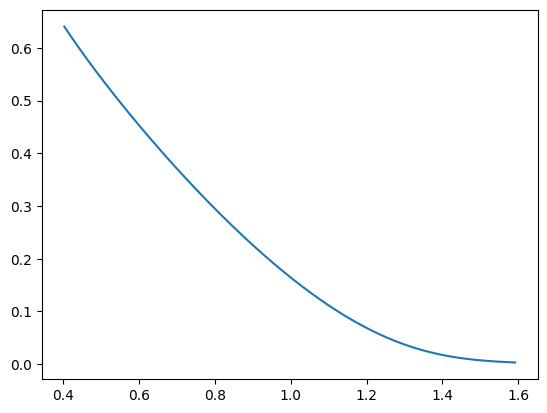

In [503]:
o = [x.real for x in C_k]
plt.plot(np.exp(ks), o, label = '0.5')

In [504]:
_, C_k_05 = compute_price(N, a,0.5, S0, V0, T, mu, kappa, theta, omega, rho, r)
_, C_k_1 = compute_price(N, a, 1, S0, V0, T, mu, kappa, theta, omega, rho, r)
_, C_k_2 = compute_price(N, a, 2, S0, V0, T, mu, kappa, theta, omega, rho, r)
_, C_k_3 = compute_price(N, a, 3, S0, V0, T, mu, kappa, theta, omega, rho, r)
_, C_k_10 = compute_price(N, a, 10, S0, V0, T, mu, kappa, theta, omega, rho, r)

100%|██████████| 220/220 [00:28<00:00,  7.64it/s]


In [505]:
C_k_05r = [x.real for x in C_k_05]
C_k_1r = [x.real for x in C_k_1]
C_k_2r = [x.real for x in C_k_2]
C_k_3r = [x.real for x in C_k_3]
C_k_10r = [x.real for x in C_k_10]

In [506]:
df = np.concatenate([np.array(C_k_05r).reshape(len(C_k_05),1), 
                     np.array(C_k_1r).reshape(len(C_k_05),1), 
                     np.array(C_k_2r).reshape(len(C_k_05),1), 
                     np.array(C_k_3r).reshape(len(C_k_05),1), 
                     np.array(C_k_10r).reshape(len(C_k_05),1)], axis = 1)

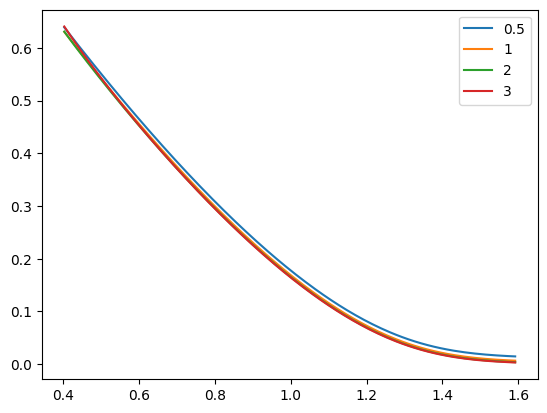

In [510]:
plt.plot(np.exp(ks), C_k_05r, label = '0.5')
plt.plot(np.exp(ks), C_k_1r, label = '1')
plt.plot(np.exp(ks), C_k_2r, label = '2')
plt.plot(np.exp(ks), C_k_3r, label = '3')
# plt.plot(np.exp(ks)[40:], C_k_10r[40:])
plt.legend()
plt.show()